In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading
## Mustard Data set!

In [4]:
df = pd.read_csv('/content/drive/MyDrive/crops_dataset/mustard.csv')

In [5]:
df

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,State
0,Kurnool,Adoni,Mustard,Other,FAQ,1550.0,1600.0,1575.0,20-02-2009,Andhra Pradesh
1,Kurnool,Alur,Mustard,Other,Medium,2918.0,2918.0,2918.0,03-05-2013,Andhra Pradesh
2,Kurnool,Alur,Mustard,Mustard,Medium,3018.0,3018.0,3018.0,25-03-2013,Andhra Pradesh
3,Kurnool,Alur,Mustard,Other,Medium,3018.0,3018.0,3018.0,25-03-2013,Andhra Pradesh
4,Kurnool,Alur,Mustard,Mustard,Medium,2598.0,2598.0,2598.0,22-04-2012,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...,...
1014643,Coochbehar,Toofanganj,Mustard,Mustard,FAQ,4300.0,4500.0,4400.0,05-06-2016,West Bengal
1014644,Coochbehar,Toofanganj,Mustard,Mustard,FAQ,4300.0,4500.0,4400.0,04-06-2016,West Bengal
1014645,Coochbehar,Toofanganj,Mustard,Mustard,FAQ,4300.0,4500.0,4400.0,03-06-2016,West Bengal
1014646,Coochbehar,Toofanganj,Mustard,Mustard,FAQ,4300.0,4500.0,4400.0,02-06-2016,West Bengal


# Pre-processing

In [6]:
df.shape

(1014648, 10)

In [7]:
rows = df.shape[0]
rows

1014648

In [8]:
cols = df.shape[1]
cols

10

In [9]:
df.isna().any()

District Name                False
Market Name                  False
Commodity                    False
Variety                      False
Grade                        False
Min Price (Rs./Quintal)      False
Max Price (Rs./Quintal)      False
Modal Price (Rs./Quintal)    False
Price Date                   False
State                        False
dtype: bool

## Dealing with Null Values!

In [10]:
# Number of Null values in the entire dataframe
df.isna().sum().sum()

0

In [11]:
## Checking number of null values in all the columns!

column_names = list(df.columns)
for i in range(0, len(column_names)):
  print(f"Column No: {i+1} = {column_names[i]} has {df[column_names[i]].isna().sum()} Null values!")

Column No: 1 = District Name has 0 Null values!
Column No: 2 = Market Name has 0 Null values!
Column No: 3 = Commodity has 0 Null values!
Column No: 4 = Variety has 0 Null values!
Column No: 5 = Grade has 0 Null values!
Column No: 6 = Min Price (Rs./Quintal) has 0 Null values!
Column No: 7 = Max Price (Rs./Quintal) has 0 Null values!
Column No: 8 = Modal Price (Rs./Quintal) has 0 Null values!
Column No: 9 = Price Date has 0 Null values!
Column No: 10 = State has 0 Null values!


In [12]:
# No of unique values in all the columns

for i in range(0, len(column_names)):
  print(f'The column {column_names[i]} has {df[column_names[i]].nunique()} unique values!')

The column District Name has 332 unique values!
The column Market Name has 1086 unique values!
The column Commodity has 1 unique values!
The column Variety has 11 unique values!
The column Grade has 3 unique values!
The column Min Price (Rs./Quintal) has 6759 unique values!
The column Max Price (Rs./Quintal) has 7539 unique values!
The column Modal Price (Rs./Quintal) has 7821 unique values!
The column Price Date has 5113 unique values!
The column State has 26 unique values!


In [13]:
df.columns

Index(['District Name', 'Market Name', 'Commodity', 'Variety', 'Grade',
       'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)',
       'Modal Price (Rs./Quintal)', 'Price Date', 'State'],
      dtype='object')

In [14]:
import pandas as pd

# Assuming df is your DataFrame
df.columns = df.columns.str.replace(' ', '_').str.lower()

# Alternatively, you can use the following code to replace spaces with underscores and convert to lowercase
# df.columns = [col.lower().replace(' ', '_') for col in df.columns]

# Now, the column names will be in lowercase and with underscores instead of spaces
print(df.columns)


Index(['district_name', 'market_name', 'commodity', 'variety', 'grade',
       'min_price_(rs./quintal)', 'max_price_(rs./quintal)',
       'modal_price_(rs./quintal)', 'price_date', 'state'],
      dtype='object')


In [15]:
df.head(5)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state
0,Kurnool,Adoni,Mustard,Other,FAQ,1550.0,1600.0,1575.0,20-02-2009,Andhra Pradesh
1,Kurnool,Alur,Mustard,Other,Medium,2918.0,2918.0,2918.0,03-05-2013,Andhra Pradesh
2,Kurnool,Alur,Mustard,Mustard,Medium,3018.0,3018.0,3018.0,25-03-2013,Andhra Pradesh
3,Kurnool,Alur,Mustard,Other,Medium,3018.0,3018.0,3018.0,25-03-2013,Andhra Pradesh
4,Kurnool,Alur,Mustard,Mustard,Medium,2598.0,2598.0,2598.0,22-04-2012,Andhra Pradesh


In [16]:
df['month'] = df['price_date'].str[3:5].astype(int)
df['year'] = df['price_date'].str[6:].astype(int)


In [17]:
df.head(3)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year
0,Kurnool,Adoni,Mustard,Other,FAQ,1550.0,1600.0,1575.0,20-02-2009,Andhra Pradesh,2,2009
1,Kurnool,Alur,Mustard,Other,Medium,2918.0,2918.0,2918.0,03-05-2013,Andhra Pradesh,5,2013
2,Kurnool,Alur,Mustard,Mustard,Medium,3018.0,3018.0,3018.0,25-03-2013,Andhra Pradesh,3,2013


In [18]:
df['price_date'].dtype


dtype('O')

In [19]:
# Convert 'price_date' to timestamp
df['price_date'] = pd.to_datetime(df['price_date'], format='%d-%m-%Y')

# Convert 'month' and 'year' to int
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)

# Display the updated DataFrame
print(df.dtypes)

district_name                        object
market_name                          object
commodity                            object
variety                              object
grade                                object
min_price_(rs./quintal)             float64
max_price_(rs./quintal)             float64
modal_price_(rs./quintal)           float64
price_date                   datetime64[ns]
state                                object
month                                 int64
year                                  int64
dtype: object


In [20]:
df_copy = df

# Encoding Columns

## district Name

In [21]:
df['district_name'].nunique()

332

In [22]:
value_counts = df['district_name'].value_counts()

In [23]:
value_counts

Ganganagar         35492
Banaskanth         22522
Bharatpur          18705
Burdwan            18092
Agra               17958
                   ...  
Nowarangpur            1
Udupi                  1
Tumkur                 1
Alleppey               1
Uttar Dinajpur         1
Name: district_name, Length: 332, dtype: int64

In [24]:
district_name_frequency = df['district_name'].value_counts(normalize=False)

# Create a new column with encoded values
df['district_name_encoded'] = df['district_name'].map(district_name_frequency)

In [25]:
df.head(5)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded
0,Kurnool,Adoni,Mustard,Other,FAQ,1550.0,1600.0,1575.0,2009-02-20,Andhra Pradesh,2,2009,9
1,Kurnool,Alur,Mustard,Other,Medium,2918.0,2918.0,2918.0,2013-05-03,Andhra Pradesh,5,2013,9
2,Kurnool,Alur,Mustard,Mustard,Medium,3018.0,3018.0,3018.0,2013-03-25,Andhra Pradesh,3,2013,9
3,Kurnool,Alur,Mustard,Other,Medium,3018.0,3018.0,3018.0,2013-03-25,Andhra Pradesh,3,2013,9
4,Kurnool,Alur,Mustard,Mustard,Medium,2598.0,2598.0,2598.0,2012-04-22,Andhra Pradesh,4,2012,9


## market name

In [26]:
df['market_name'].nunique()

1086

In [27]:
value_counts = df['market_name'].value_counts()

In [28]:
value_counts

Samsi                         6258
Pratapgarh                    5007
Bishnupur(Bankura)            4786
Unjha                         4579
Fatehpur                      4556
                              ... 
Jalna(Badnapur)                  1
Dhanera(Veg,Yard Dhanera)        1
Digras                           1
Barshi(Vairag)                   1
Adoni                            1
Name: market_name, Length: 1086, dtype: int64

In [29]:
market_name_frequency = df['market_name'].value_counts(normalize=False)

# Create a new column with encoded values
df['market_name_encoded'] = df['market_name'].map(market_name_frequency)

In [30]:
df.head(5)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded
0,Kurnool,Adoni,Mustard,Other,FAQ,1550.0,1600.0,1575.0,2009-02-20,Andhra Pradesh,2,2009,9,1
1,Kurnool,Alur,Mustard,Other,Medium,2918.0,2918.0,2918.0,2013-05-03,Andhra Pradesh,5,2013,9,6
2,Kurnool,Alur,Mustard,Mustard,Medium,3018.0,3018.0,3018.0,2013-03-25,Andhra Pradesh,3,2013,9,6
3,Kurnool,Alur,Mustard,Other,Medium,3018.0,3018.0,3018.0,2013-03-25,Andhra Pradesh,3,2013,9,6
4,Kurnool,Alur,Mustard,Mustard,Medium,2598.0,2598.0,2598.0,2012-04-22,Andhra Pradesh,4,2012,9,6


In [31]:
df = df.drop('commodity',axis=1)

## variety

In [32]:
df['variety'].nunique()

11

In [33]:
value_counts = df['variety'].value_counts()

In [34]:
variety_frequency = df['variety'].value_counts(normalize=False)

# Create a new column with encoded values
df['variety_encoded'] = df['variety'].map(variety_frequency)

In [35]:
df.head(5)

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded,variety_encoded
0,Kurnool,Adoni,Other,FAQ,1550.0,1600.0,1575.0,2009-02-20,Andhra Pradesh,2,2009,9,1,544052
1,Kurnool,Alur,Other,Medium,2918.0,2918.0,2918.0,2013-05-03,Andhra Pradesh,5,2013,9,6,544052
2,Kurnool,Alur,Mustard,Medium,3018.0,3018.0,3018.0,2013-03-25,Andhra Pradesh,3,2013,9,6,109340
3,Kurnool,Alur,Other,Medium,3018.0,3018.0,3018.0,2013-03-25,Andhra Pradesh,3,2013,9,6,544052
4,Kurnool,Alur,Mustard,Medium,2598.0,2598.0,2598.0,2012-04-22,Andhra Pradesh,4,2012,9,6,109340


## grade

In [36]:
df['grade'].unique()

array(['FAQ ', 'Medium ', 'Large '], dtype=object)

In [37]:
value_counts = df['grade'].value_counts()
value_counts

FAQ        1014387
Medium         248
Large           13
Name: grade, dtype: int64

In [38]:
grade_frequency = df['grade'].value_counts(normalize=False)

# Create a new column with encoded values
df['grade_encoded'] = df['grade'].map(grade_frequency)

In [39]:
df.head(5)

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded
0,Kurnool,Adoni,Other,FAQ,1550.0,1600.0,1575.0,2009-02-20,Andhra Pradesh,2,2009,9,1,544052,1014387
1,Kurnool,Alur,Other,Medium,2918.0,2918.0,2918.0,2013-05-03,Andhra Pradesh,5,2013,9,6,544052,248
2,Kurnool,Alur,Mustard,Medium,3018.0,3018.0,3018.0,2013-03-25,Andhra Pradesh,3,2013,9,6,109340,248
3,Kurnool,Alur,Other,Medium,3018.0,3018.0,3018.0,2013-03-25,Andhra Pradesh,3,2013,9,6,544052,248
4,Kurnool,Alur,Mustard,Medium,2598.0,2598.0,2598.0,2012-04-22,Andhra Pradesh,4,2012,9,6,109340,248


## state

In [40]:
df['state'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'NCT of Delhi', 'Gujarat', 'Himachal Pradesh', 'Haryana',
       'Jharkhand', 'Karnataka', 'Kerala', 'Meghalaya', 'Maharashtra',
       'Manipur', 'Madhya Pradesh', 'Mizoram', 'Odisha', 'Punjab',
       'Pondicherry', 'Rajasthan', 'Telangana', 'Tamil Nadu', 'Tripura',
       'Uttrakhand', 'Uttar Pradesh', 'West Bengal'], dtype=object)

In [41]:
value_counts = df['state'].value_counts()
value_counts

Uttar Pradesh        352554
Rajasthan            255782
Madhya Pradesh       207727
Gujarat               79155
West Bengal           64997
Haryana               23665
Maharashtra            7846
Assam                  5734
NCT of Delhi           5272
Jharkhand              3706
Karnataka              3484
Punjab                 1115
Manipur                 690
Uttrakhand              593
Kerala                  552
Telangana               475
Bihar                   462
Mizoram                 414
Odisha                  176
Pondicherry             106
Meghalaya                50
Himachal Pradesh         31
Tamil Nadu               28
Andhra Pradesh           21
Arunachal Pradesh        11
Tripura                   2
Name: state, dtype: int64

In [42]:
state_frequency = df['state'].value_counts(normalize=False)

# Create a new column with encoded values
df['state_encoded'] = df['state'].map(state_frequency)

In [43]:
df.head(5)

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded
0,Kurnool,Adoni,Other,FAQ,1550.0,1600.0,1575.0,2009-02-20,Andhra Pradesh,2,2009,9,1,544052,1014387,21
1,Kurnool,Alur,Other,Medium,2918.0,2918.0,2918.0,2013-05-03,Andhra Pradesh,5,2013,9,6,544052,248,21
2,Kurnool,Alur,Mustard,Medium,3018.0,3018.0,3018.0,2013-03-25,Andhra Pradesh,3,2013,9,6,109340,248,21
3,Kurnool,Alur,Other,Medium,3018.0,3018.0,3018.0,2013-03-25,Andhra Pradesh,3,2013,9,6,544052,248,21
4,Kurnool,Alur,Mustard,Medium,2598.0,2598.0,2598.0,2012-04-22,Andhra Pradesh,4,2012,9,6,109340,248,21


# Taking only the Encoded columns

In [44]:
df_encoded = df[['district_name_encoded', 'market_name_encoded', 'variety_encoded', 'grade_encoded', 'state_encoded', 'month', 'year', 'price_date', 'min_price_(rs./quintal)', 'max_price_(rs./quintal)', 'modal_price_(rs./quintal)']]


# Encoded Dataset

In [45]:
df_encoded.head(8)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,9,1,544052,1014387,21,2,2009,2009-02-20,1550.0,1600.0,1575.0
1,9,6,544052,248,21,5,2013,2013-05-03,2918.0,2918.0,2918.0
2,9,6,109340,248,21,3,2013,2013-03-25,3018.0,3018.0,3018.0
3,9,6,544052,248,21,3,2013,2013-03-25,3018.0,3018.0,3018.0
4,9,6,109340,248,21,4,2012,2012-04-22,2598.0,2598.0,2598.0
5,9,6,544052,248,21,3,2012,2012-03-13,2557.0,2557.0,2557.0
6,9,6,544052,248,21,3,2012,2012-03-09,2555.0,2555.0,2555.0
7,9,9,544052,1014387,21,5,2014,2014-05-10,3200.0,3300.0,3250.0


# Heat Map

<ipython-input-46-f636cb7d937b>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


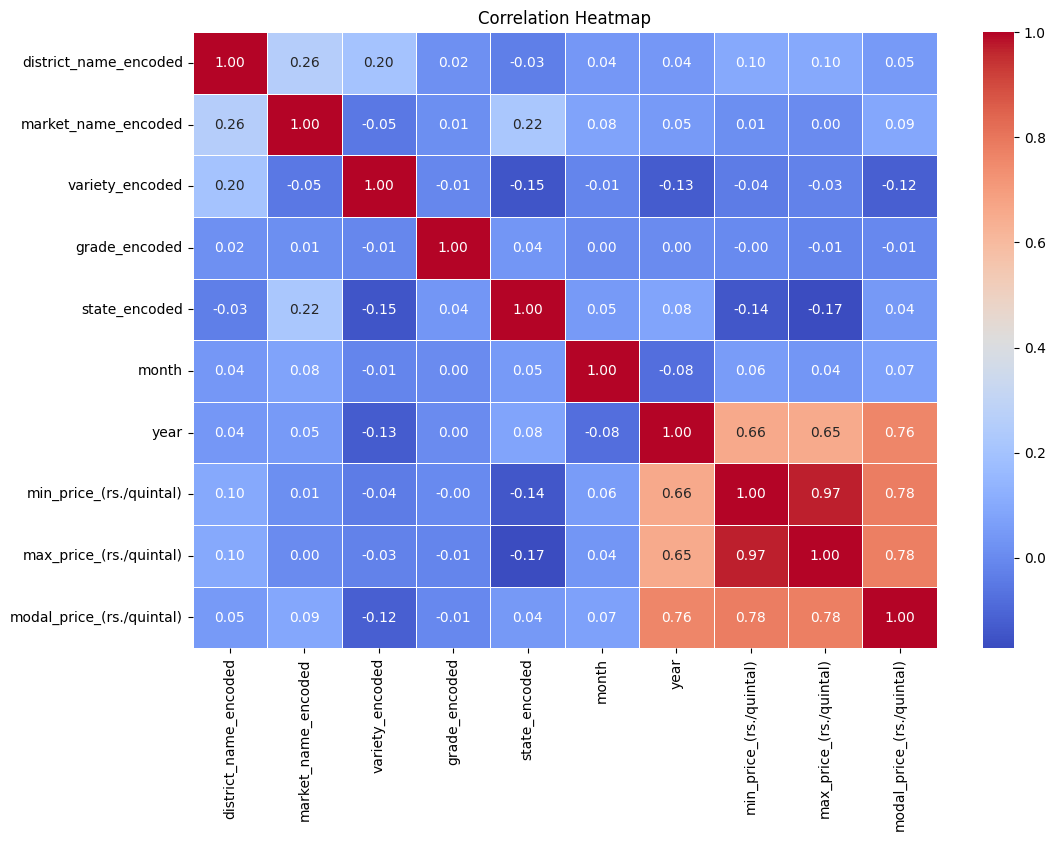

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Models and Evaluation

In [47]:
# Evaluation Metrics

def Emetrics(y_test,y_pred):
  from sklearn import metrics

  # Print result of MAE
  print(f"Mean Absoulute error is : {metrics.mean_absolute_error(y_test,y_pred)}")

  # Print result of RMSE
  print(f"Root Mean Square error is: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")

  # Print result of R2
  print(f"R2 score is: {metrics.r2_score(y_test,y_pred)}")

In [48]:
df_encoded.head(5)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,9,1,544052,1014387,21,2,2009,2009-02-20,1550.0,1600.0,1575.0
1,9,6,544052,248,21,5,2013,2013-05-03,2918.0,2918.0,2918.0
2,9,6,109340,248,21,3,2013,2013-03-25,3018.0,3018.0,3018.0
3,9,6,544052,248,21,3,2013,2013-03-25,3018.0,3018.0,3018.0
4,9,6,109340,248,21,4,2012,2012-04-22,2598.0,2598.0,2598.0


# Outlier Removing rows

In [49]:
import pandas as pd
from scipy.stats import zscore

# Assuming df_encoded is your DataFrame
# Replace 'df_encoded' with your actual DataFrame name

# Function to identify outliers using Z-score
def identify_outliers_zscore(df, threshold=3):
    z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))
    outliers = (abs(z_scores) > threshold).any(axis=1)
    return outliers

# Identify outliers
outliers = identify_outliers_zscore(df_encoded)

# Remove rows with outliers
df_cleaned = df_encoded[~outliers]



In [50]:
df_encoded = df_cleaned

## Standardizing values (min-max scalar)

In [51]:
df_encoded

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,9,1,544052,1014387,21,2,2009,2009-02-20,1550.0,1600.0,1575.0
7,9,9,544052,1014387,21,5,2014,2014-05-10,3200.0,3300.0,3250.0
8,9,9,544052,1014387,21,3,2014,2014-03-15,2712.0,2725.0,2718.0
9,9,9,544052,1014387,21,3,2014,2014-03-11,2728.0,2850.0,2789.0
10,9,9,544052,1014387,21,3,2014,2014-03-05,2850.0,2875.0,2863.0
...,...,...,...,...,...,...,...,...,...,...,...
1014643,2432,1231,109340,1014387,64997,6,2016,2016-06-05,4300.0,4500.0,4400.0
1014644,2432,1231,109340,1014387,64997,6,2016,2016-06-04,4300.0,4500.0,4400.0
1014645,2432,1231,109340,1014387,64997,6,2016,2016-06-03,4300.0,4500.0,4400.0
1014646,2432,1231,109340,1014387,64997,6,2016,2016-06-02,4300.0,4500.0,4400.0


In [52]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df_encoded is your DataFrame
# Replace 'df_encoded' with your actual DataFrame name

# Columns to be scaled
columns_to_scale = ['district_name_encoded', 'market_name_encoded', 'variety_encoded', 'grade_encoded', 'state_encoded']

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_encoded[columns_to_scale] = min_max_scaler.fit_transform(df_encoded[columns_to_scale])


In [53]:
df_encoded.head(5)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,0.000355,0.000000,1.0,0.0,0.000054,2,2009,2009-02-20,1550.0,1600.0,1575.0
7,0.000355,0.001598,1.0,0.0,0.000054,5,2014,2014-05-10,3200.0,3300.0,3250.0
8,0.000355,0.001598,1.0,0.0,0.000054,3,2014,2014-03-15,2712.0,2725.0,2718.0
9,0.000355,0.001598,1.0,0.0,0.000054,3,2014,2014-03-11,2728.0,2850.0,2789.0
10,0.000355,0.001598,1.0,0.0,0.000054,3,2014,2014-03-05,2850.0,2875.0,2863.0


## Forward Stepwise Selection

In [54]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def forward_stepwise_selection(X, y):
    # Initialize an empty set of features
    selected_features = []

    # Initialize a linear regression model
    model = LinearRegression()

    # Loop until all features have been added to the model
    while len(selected_features) < X.shape[1]:

        # Initialize variables to keep track of best feature and score
        best_feature = None
        best_score = -np.inf

        # Loop over all remaining features
        for feature in X.columns:
            if feature not in selected_features:
                # Fit a model with the current set of features plus the new feature
                current_features = selected_features + [feature]
                X_current = X[current_features]
                model.fit(X_current, y)

                # Calculate the score for the new model
                y_pred = model.predict(X_current)
                score = r2_score(y, y_pred)

                # Keep track of the best feature and score
                if score > best_score:
                    best_feature = feature
                    best_score = score

        # Add the best feature to the selected features and print the result
        selected_features.append(best_feature)
        print(f'Selected feature: {best_feature}, Score: {best_score:.4f}')

    return selected_features


In [55]:
X = df_encoded.loc[:, ['district_name_encoded',	'market_name_encoded',	'variety_encoded',	'grade_encoded',	'state_encoded',	'month',	'year']]
y = df_encoded.loc[:, ['min_price_(rs./quintal)',	'max_price_(rs./quintal)',	'modal_price_(rs./quintal)']]

In [56]:
print(forward_stepwise_selection(X, y))

Selected feature: year, Score: 0.4664
Selected feature: state_encoded, Score: 0.5020
Selected feature: month, Score: 0.5111
Selected feature: district_name_encoded, Score: 0.5128
Selected feature: market_name_encoded, Score: 0.5138
Selected feature: variety_encoded, Score: 0.5142
Selected feature: grade_encoded, Score: 0.5142
['year', 'state_encoded', 'month', 'district_name_encoded', 'market_name_encoded', 'variety_encoded', 'grade_encoded']


### All the features are closely important

## Linear Regression

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state = 42)

In [59]:
from sklearn.linear_model import LinearRegression
lnregressor = LinearRegression()
lnregressor.fit(X_train,y_train)

LinearRegression()

In [60]:
y_pred = lnregressor.predict(X_test)
y_pred

array([[4190.1382068 , 4483.86492836, 4421.83537047],
       [3658.89333582, 3857.15669394, 4181.72694876],
       [4309.36913494, 4548.06417549, 4499.98213734],
       ...,
       [1656.64882955, 1732.54375615, 2252.74179464],
       [1840.5384277 , 1997.79341082, 2449.07459971],
       [1657.72370405, 1785.97843262, 2452.32391763]])

In [61]:
# Evaluation metrics for Linear Regression
Emetrics(y_test,y_pred)

Mean Absoulute error is : 673.9414588016866
Root Mean Square error is: 941.194779349621
R2 score is: 0.5148324590138049


## Decision Tree Regression

In [62]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model using the training sets
dt_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_regressor.predict(X_test)

In [63]:
# Evaluation metrics for Linear Regression
Emetrics(y_test,y_pred)

Mean Absoulute error is : 110.83483902287087
Root Mean Square error is: 271.60438913416414
R2 score is: 0.9579067896113065


## Random Forest Regression

In [64]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(
    n_estimators=200,  # Reduced number of trees
    max_depth=30,  # Reduced maximum depth
    random_state=42,
    bootstrap=True,
    warm_start=True,  # Enable incremental training
    n_jobs=-1  # Utilize all CPU cores
)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

In [65]:
Emetrics(y_test,y_pred)

Mean Absoulute error is : 110.10237198789294
Root Mean Square error is: 264.267960676287
R2 score is: 0.96018863898288


## XgBoost Regression

In [66]:
from xgboost import XGBRegressor
# Create the XGBoost regression model
xg_regressor = XGBRegressor(n_estimators=250, learning_rate=0.37,random_state=42)

# Train the model
xg_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = xg_regressor.predict(X_test)

# Evaluate the model's performance
Emetrics(y_test,y_pred)

Mean Absoulute error is : 183.74180386024878
Root Mean Square error is: 334.051395473865
R2 score is: 0.9383478562126308


## KNN Regression

In [71]:
from sklearn.neighbors import KNeighborsRegressor

# Create the KNN regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_regressor.predict(X_test)


# Evaluate the model's performance
Emetrics(y_test,y_pred)

Mean Absoulute error is : 126.40658522348009
Root Mean Square error is: 308.33359382776524
R2 score is: 0.946494867960893


# Datasets of Mustard

## Main

In [72]:
df

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded
0,Kurnool,Adoni,Other,FAQ,1550.0,1600.0,1575.0,2009-02-20,Andhra Pradesh,2,2009,9,1,544052,1014387,21
1,Kurnool,Alur,Other,Medium,2918.0,2918.0,2918.0,2013-05-03,Andhra Pradesh,5,2013,9,6,544052,248,21
2,Kurnool,Alur,Mustard,Medium,3018.0,3018.0,3018.0,2013-03-25,Andhra Pradesh,3,2013,9,6,109340,248,21
3,Kurnool,Alur,Other,Medium,3018.0,3018.0,3018.0,2013-03-25,Andhra Pradesh,3,2013,9,6,544052,248,21
4,Kurnool,Alur,Mustard,Medium,2598.0,2598.0,2598.0,2012-04-22,Andhra Pradesh,4,2012,9,6,109340,248,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014643,Coochbehar,Toofanganj,Mustard,FAQ,4300.0,4500.0,4400.0,2016-06-05,West Bengal,6,2016,2432,1231,109340,1014387,64997
1014644,Coochbehar,Toofanganj,Mustard,FAQ,4300.0,4500.0,4400.0,2016-06-04,West Bengal,6,2016,2432,1231,109340,1014387,64997
1014645,Coochbehar,Toofanganj,Mustard,FAQ,4300.0,4500.0,4400.0,2016-06-03,West Bengal,6,2016,2432,1231,109340,1014387,64997
1014646,Coochbehar,Toofanganj,Mustard,FAQ,4300.0,4500.0,4400.0,2016-06-02,West Bengal,6,2016,2432,1231,109340,1014387,64997


### Saving the dataframe of mustard

> Indented block



In [73]:
df.to_csv('musdf.csv')

## Encoded

In [74]:
df_encoded

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,0.000355,0.000000,1.000000,0.0,0.000054,2,2009,2009-02-20,1550.0,1600.0,1575.0
7,0.000355,0.001598,1.000000,0.0,0.000054,5,2014,2014-05-10,3200.0,3300.0,3250.0
8,0.000355,0.001598,1.000000,0.0,0.000054,3,2014,2014-03-15,2712.0,2725.0,2718.0
9,0.000355,0.001598,1.000000,0.0,0.000054,3,2014,2014-03-11,2728.0,2850.0,2789.0
10,0.000355,0.001598,1.000000,0.0,0.000054,3,2014,2014-03-05,2850.0,2875.0,2863.0
...,...,...,...,...,...,...,...,...,...,...,...
1014643,0.107944,0.245705,0.200972,0.0,0.184356,6,2016,2016-06-05,4300.0,4500.0,4400.0
1014644,0.107944,0.245705,0.200972,0.0,0.184356,6,2016,2016-06-04,4300.0,4500.0,4400.0
1014645,0.107944,0.245705,0.200972,0.0,0.184356,6,2016,2016-06-03,4300.0,4500.0,4400.0
1014646,0.107944,0.245705,0.200972,0.0,0.184356,6,2016,2016-06-02,4300.0,4500.0,4400.0


### Saving the encoded dataframe of mustard

In [75]:
df_encoded.to_csv('musencdf.csv')